In [1]:
from sotip import *
import numpy as np
import scanpy as sc


In [2]:
def random_spatial(num_cells,x_range,y_range):
# num_cells = adata_sub.shape[0]
# x_range = (0,100)
# y_range = (0,100)

    x_random = np.random.random(size=(num_cells,))*(x_range[1]-x_range[0])+x_range[0]
    y_random = np.random.random(size=(num_cells,))*(y_range[1]-y_range[0])+y_range[0]
    spatial_mat = np.vstack([x_random,y_random]).transpose()
    return  spatial_mat


In [3]:
adata = sc.read_h5ad('simulation_data/simulation3.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 3000 × 1000
    obs: 'gt_ct'

In [5]:
ct_names = np.array(adata.obs['gt_ct'])
ct_names_new = [s[1:-1] for s in ct_names]
adata.obs['gt_ct'] = ct_names_new
adata.obs['gt_ct'] = adata.obs['gt_ct'].astype('category')

In [6]:
def get_adata_by_order(order,adata_source):
    adata = adata_source.copy()
    order_ct = [f'Group{i}' for i in order]
    spatial_mat = np.zeros(shape=(adata.shape[0],2))
    for i in range(len(order_ct)):
        ct = order_ct[i]
        cur_ct_id = np.where(adata.obs['gt_ct']==ct)[0]
        cur_num_cells = len(cur_ct_id)
        cur_spatial = random_spatial(cur_num_cells,[30*(i),30*(i+1)],[0,90])
        spatial_mat[cur_ct_id] = cur_spatial
        # region_array[cur_ct_id] =  
    adata.obsm['spatial'] = spatial_mat
    return adata

In [8]:
cmp = palettable.cartocolors.qualitative.Pastel_10.mpl_colors

In [9]:
adata.uns['gt_ct_colors'] = cmp

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


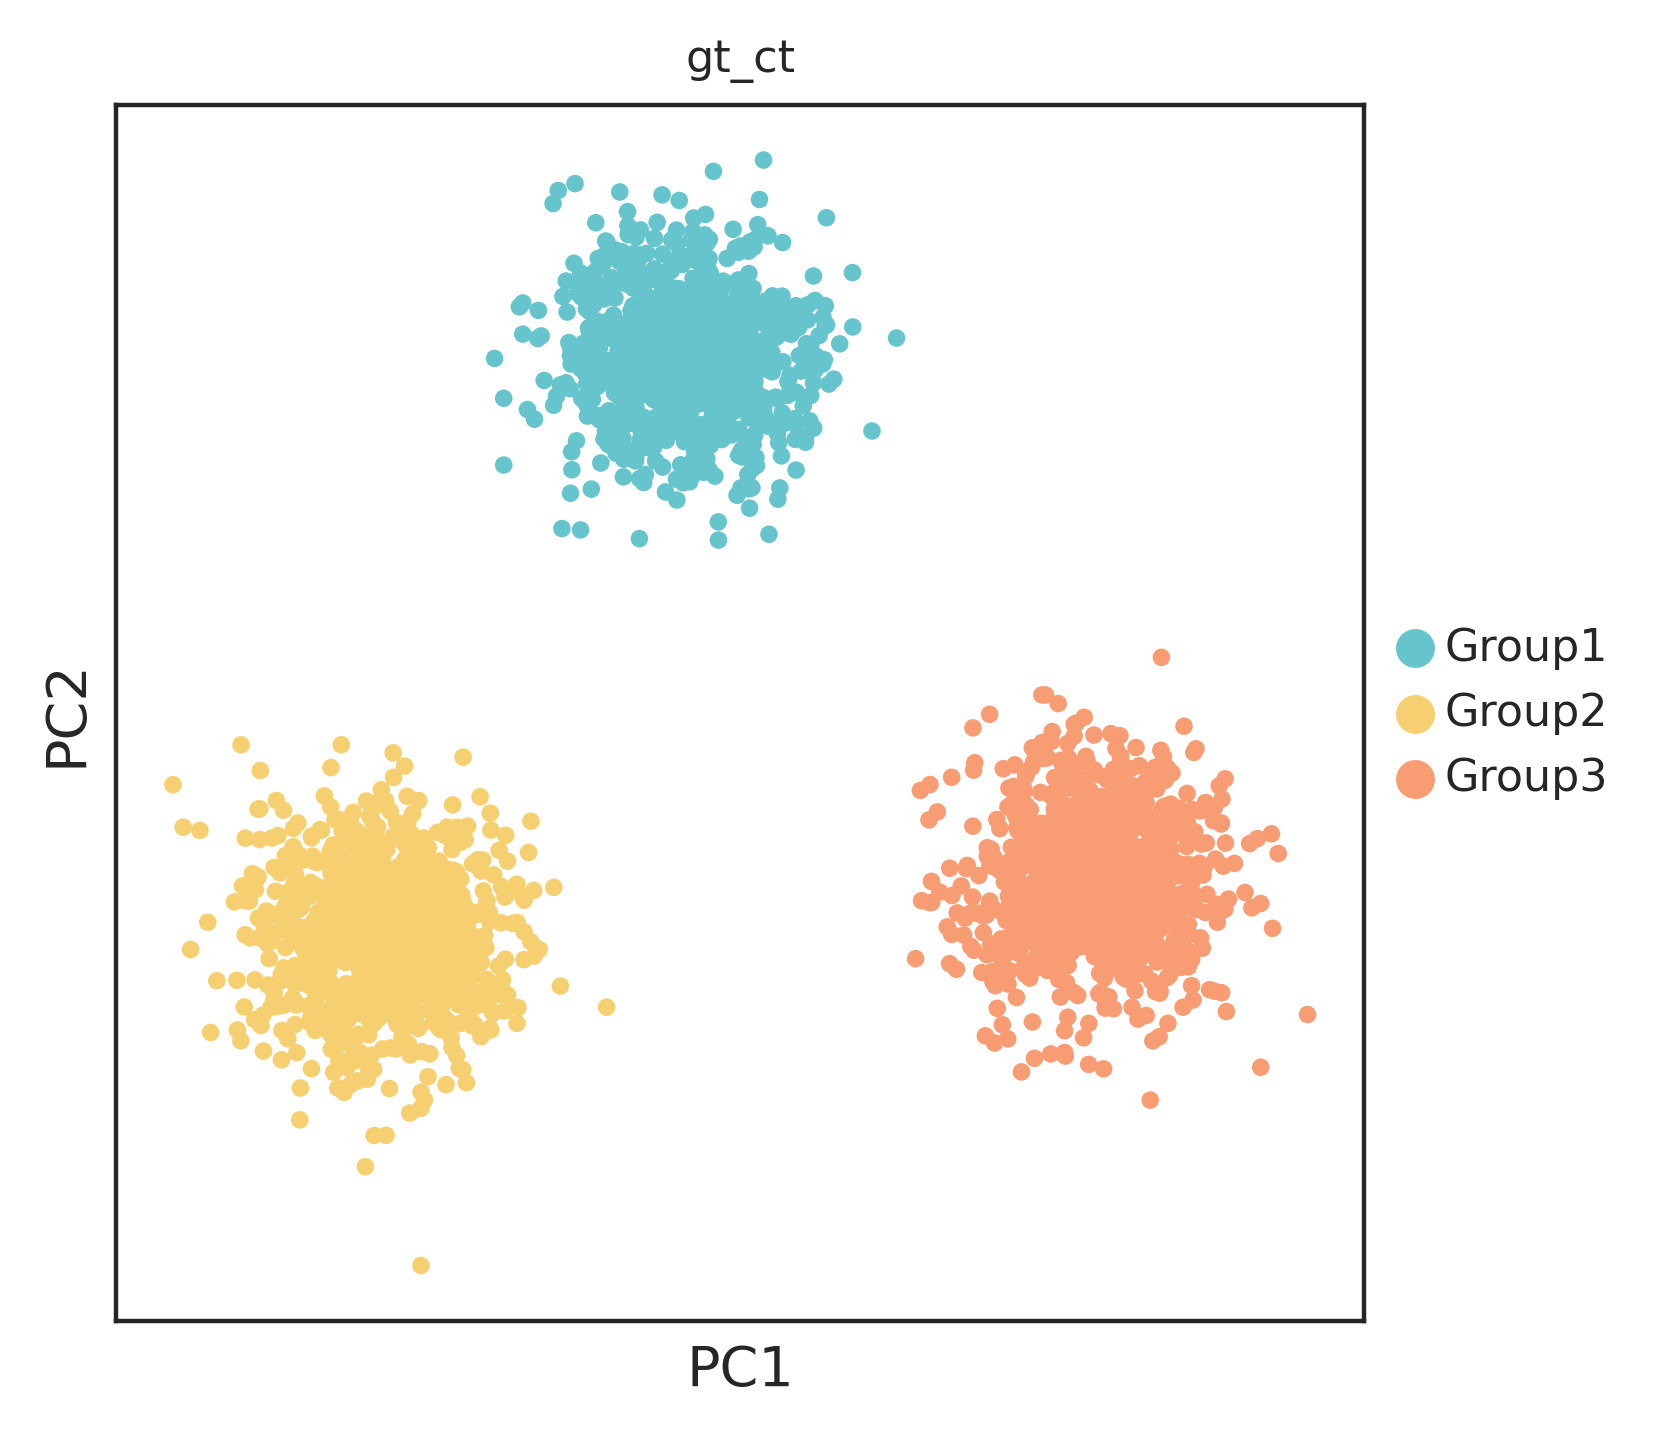

In [13]:
sc.pl.pca(adata,color=['gt_ct'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


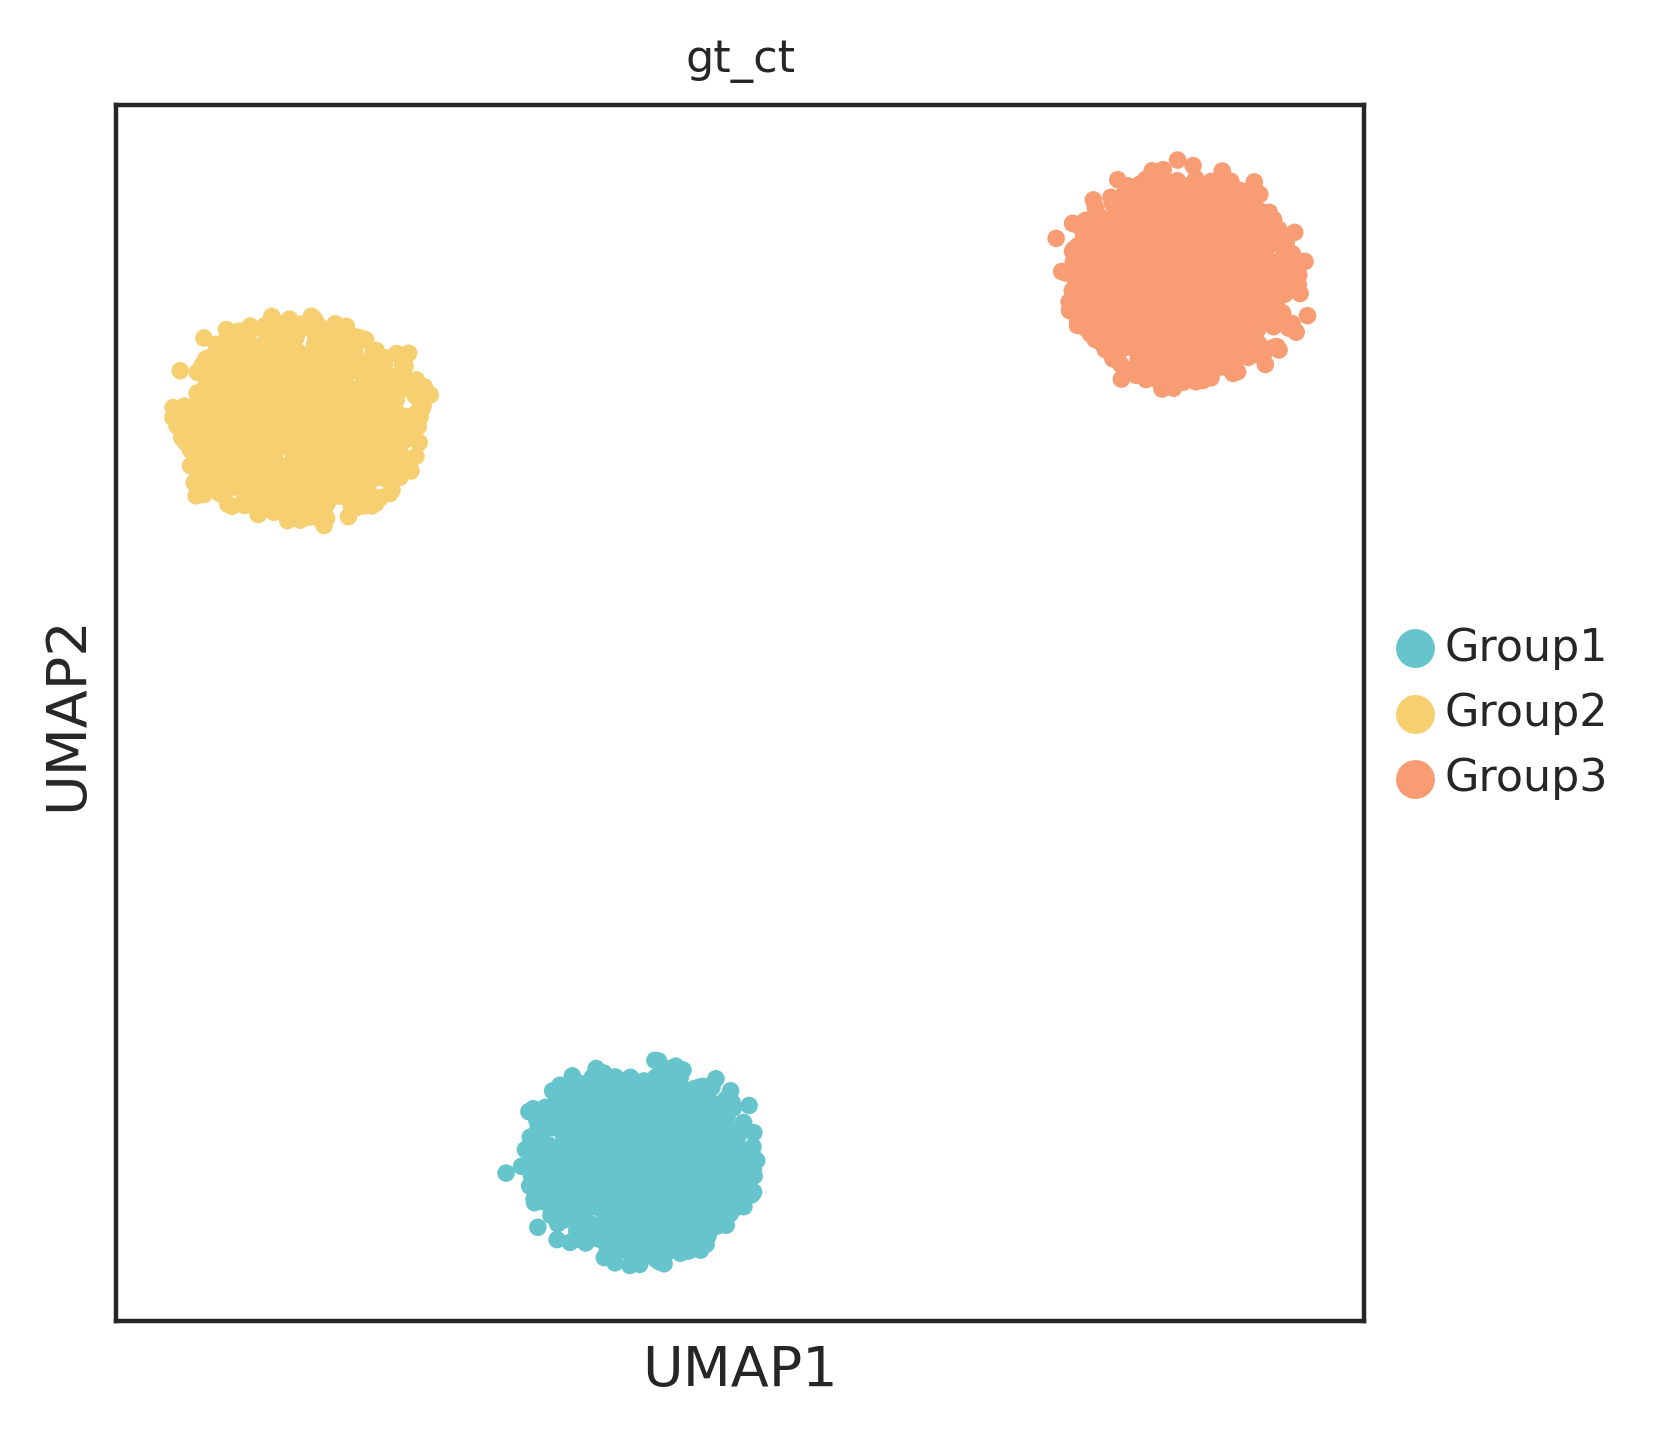

In [14]:
sc.pl.umap(adata,color=['gt_ct'])

In [15]:
np.unique(adata.obs['gt_ct'],return_counts=1)

(array(['Group1', 'Group2', 'Group3'], dtype=object),
 array([ 951, 1015, 1034]))

In [16]:
adata1 = get_adata_by_order([1,2,3],adata)
adata2 = get_adata_by_order([2,3,1],adata)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


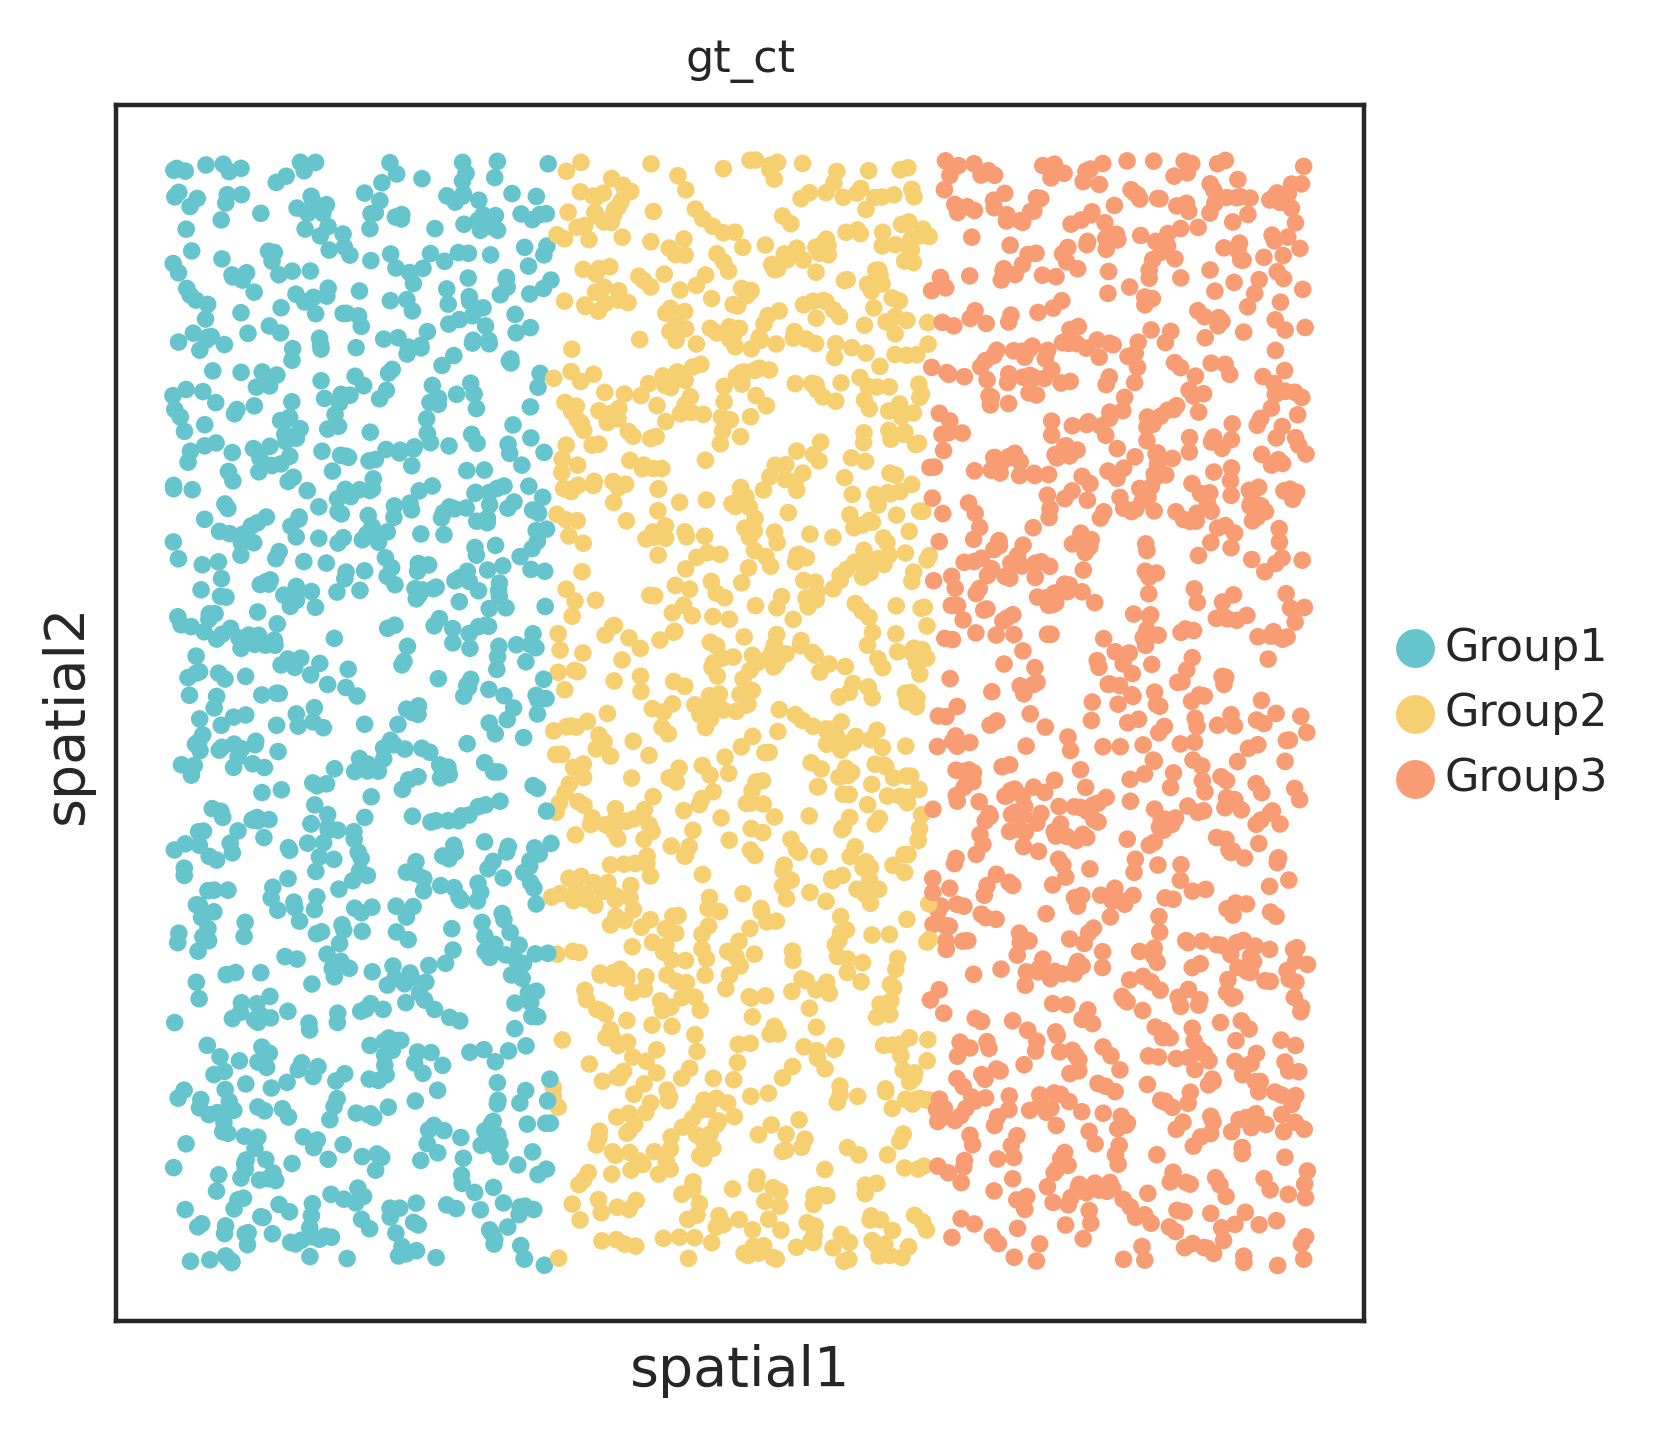

In [17]:
sc.pl.embedding(adata1,basis='spatial',color='gt_ct')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


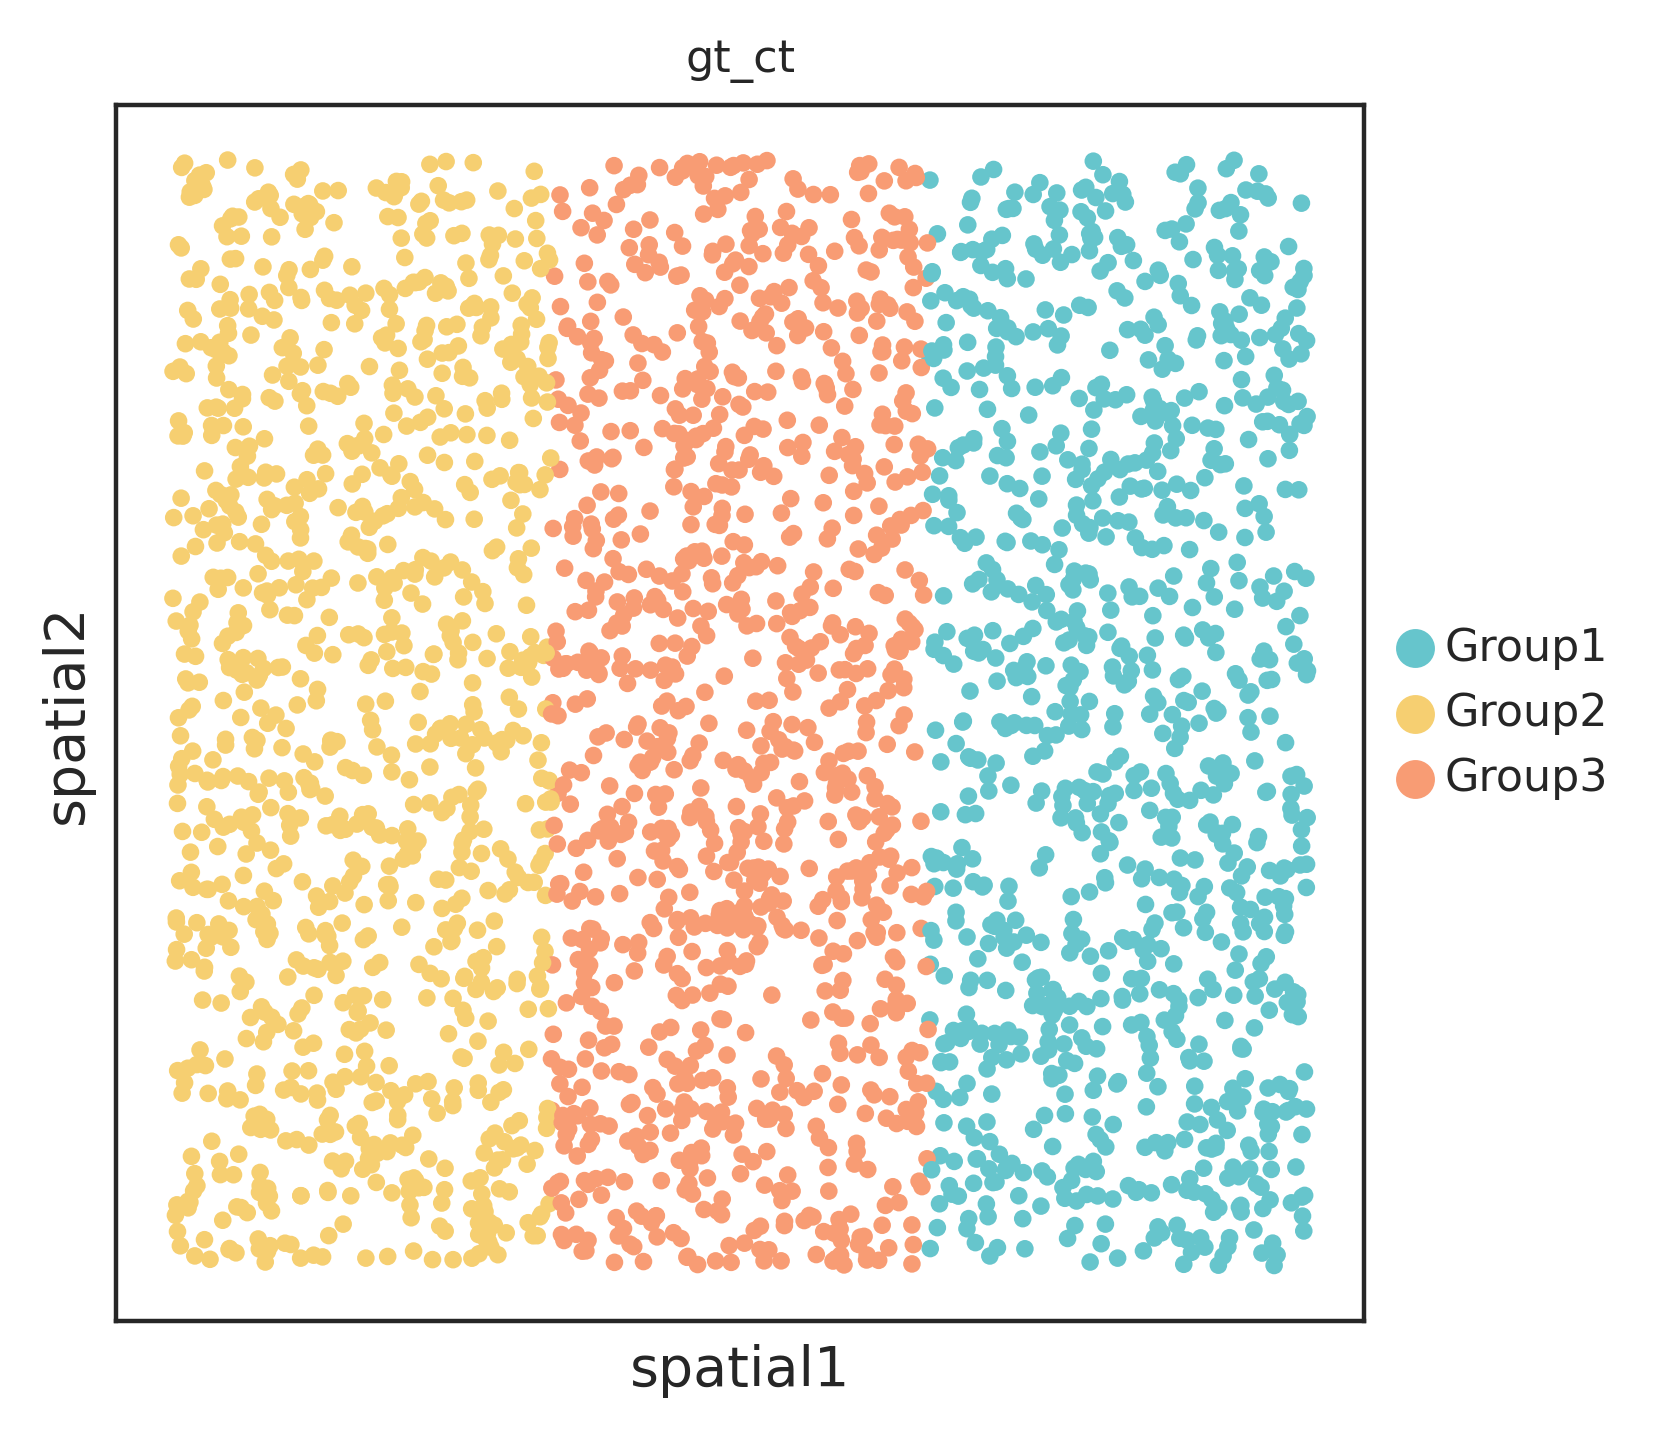

In [18]:
sc.pl.embedding(adata2,basis='spatial',color='gt_ct')

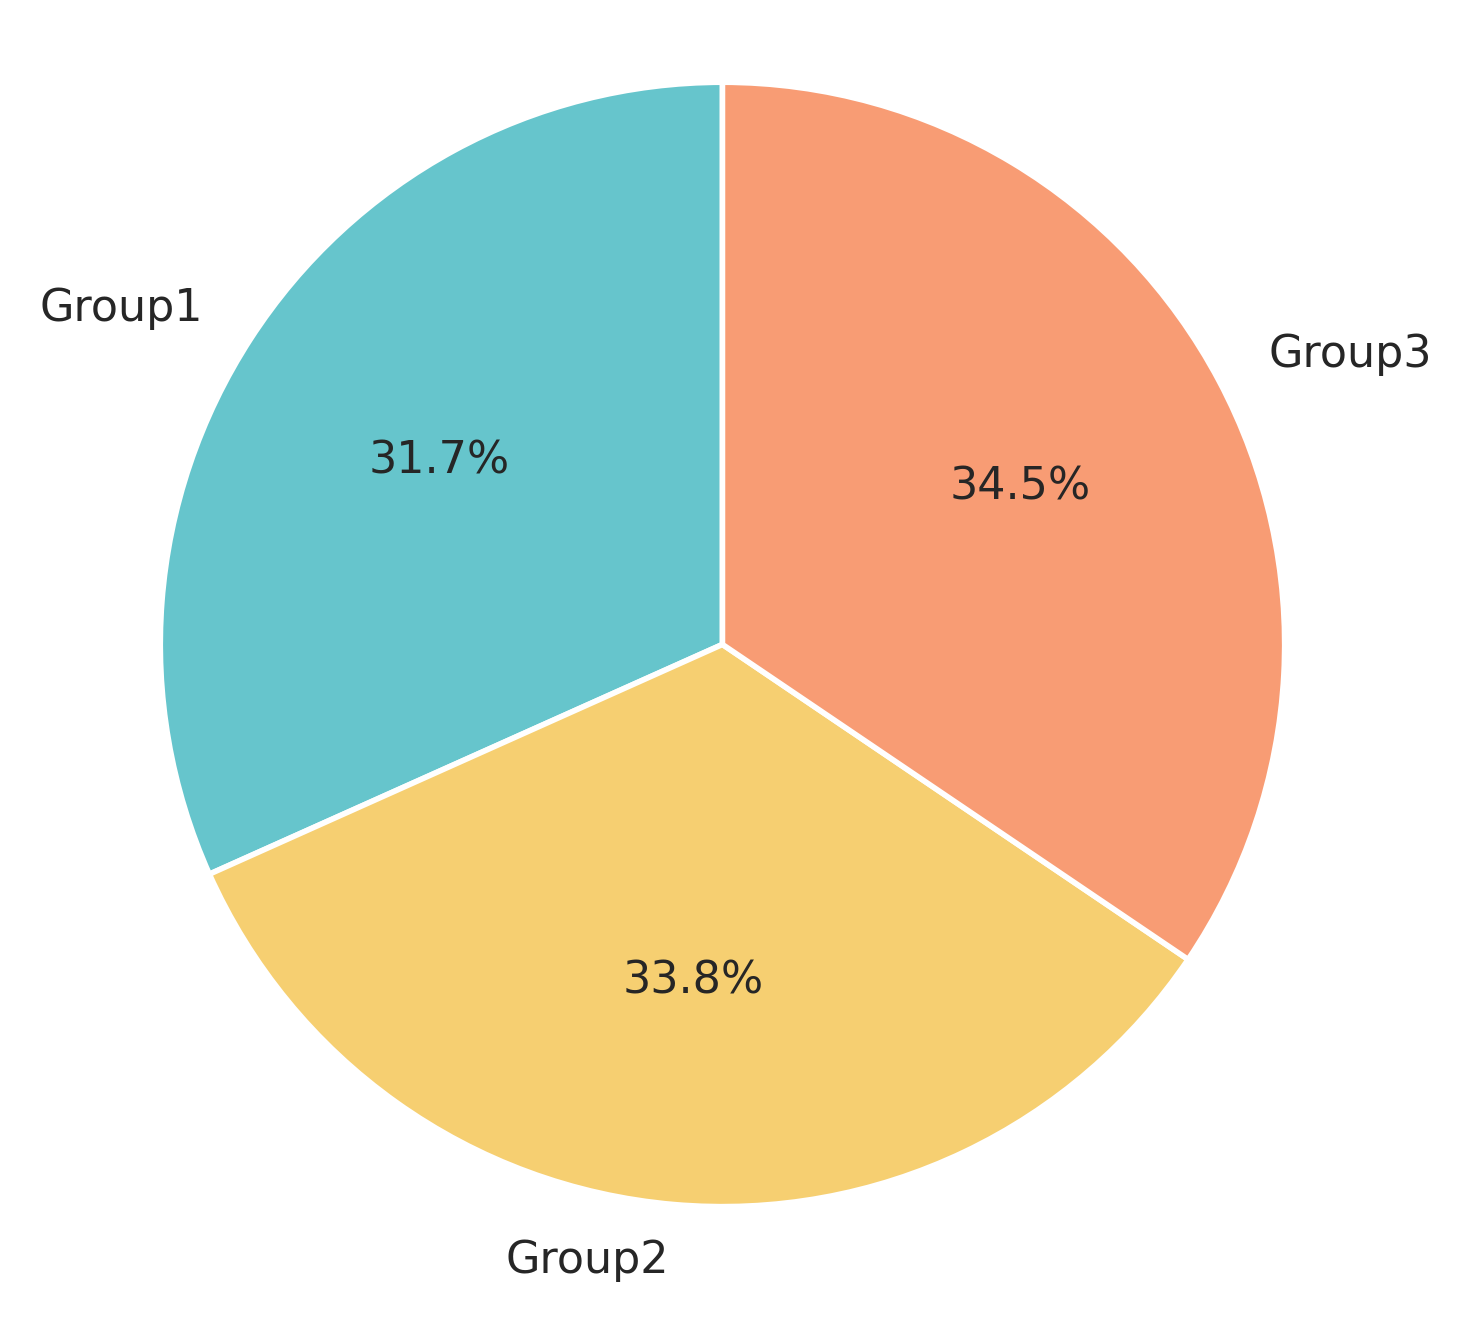

In [19]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.unique(adata.obs['gt_ct'],return_counts=1)[0]
sizes = np.unique(adata.obs['gt_ct'],return_counts=1)[1]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=adata.uns['gt_ct_colors'],
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()